<a href="https://colab.research.google.com/github/chacha715/ESAA/blob/main/mp_%EC%A0%84%EC%B2%98%EB%A6%AC_%EB%AF%BC%EA%B2%BD2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(train)
plt.show()

In [ ]:
train.fillna(0, inplace = True)
test.fillna(0, inplace = True)

In [ ]:
train.info()

In [ ]:
test.info()

6. director: 감독 이름

*   감독별 관객 수 분포 조사 -> 왜곡 정도 완화 -> 중앙값으로 rank 매기기
*   감독이 낸 영화 수를 고려하여 감독별 관객 수 평균을 이용함

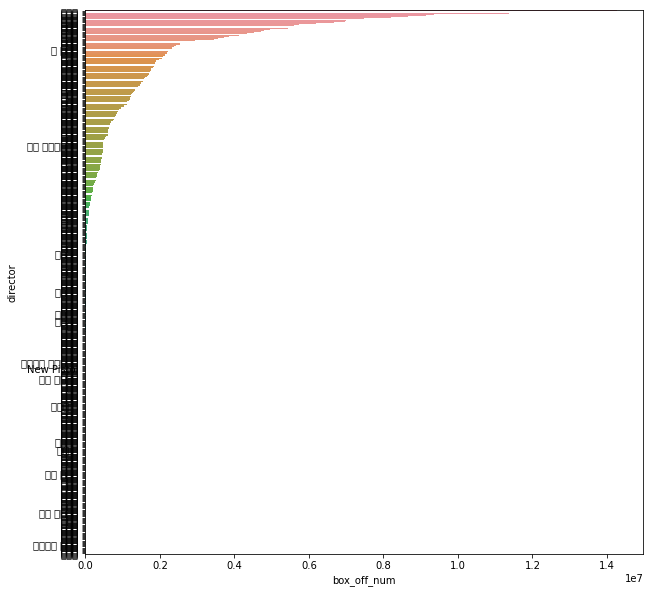

In [ ]:
director_num = train.groupby('director')['box_off_num'].mean().sort_values(ascending=False) #원래 sum이었는데 감독별 영화 수 고려하여 mean으로 수정
df6 = pd.DataFrame(director_num)
df6["director"]= df6.index #director 열 생성
plt.rcParams['figure.figsize'] = [10,10] 
ax = plt.subplots()
ax = sns.barplot(x='box_off_num', y='director',data = df6)

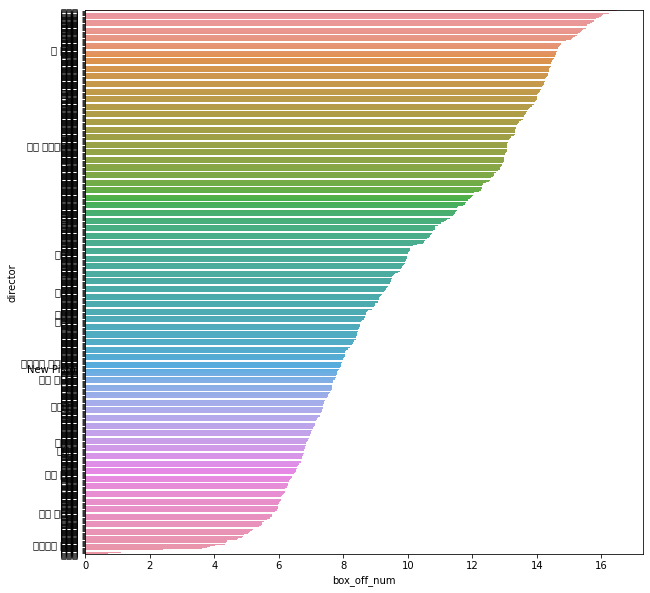

In [ ]:
#위의 그래프가 왜곡되어있으므로 log1p 변환을 통해 왜곡 정도 향상
director_num = train.groupby('director')['box_off_num'].mean().sort_values(ascending=False)
df6 = pd.DataFrame(director_num)
df6["director"]= df6.index #director 열 생성
plt.rcParams['figure.figsize'] = [10,10] 
df6["box_off_num"]=np.log1p(df6["box_off_num"])
ax = plt.subplots()
ax = sns.barplot(x='box_off_num', y='director',data = df6)

In [ ]:
df6.drop(['director'], axis=1, inplace=True)
tr_dr_rank = df6.groupby('director').box_off_num.median().reset_index(name = 'dr_rank').sort_values(by = 'dr_rank')
tr_dr_rank

,director,dr_rank
125,노성수,0.693147
85,김정호,1.098612
10,고구마,2.197225
289,이세일,2.397895
411,진광교,3.610918
...,...,...
448,한재림,16.027712
201,봉준호,16.050925
241,양우석,16.246918
416,최동훈,16.368485


In [ ]:
tr_dr_rank['dr_rank2'] = tr_dr_rank['dr_rank'].rank(method='dense', ascending=True)
#tr_dr_rank['dr_rank2'] = [i/5 + 1 for i in range(tr_dr_rank.shape[0])] #i+1로 하면 1~472로 너무 커지는 것 같아서 수정했는데, 다른 스케일링 이용할지?
#로그 스케일링 한 거니까 랭크 매기기 전 값으로 진행하면..? 일단 매기기 전 값이 dr_rank, 랭크가 dr_rank2

In [ ]:
tr_dr_rank

,director,dr_rank,dr_rank2
125,노성수,0.693147,1.0
85,김정호,1.098612,2.0
10,고구마,2.197225,3.0
289,이세일,2.397895,4.0
411,진광교,3.610918,5.0
...,...,...,...
448,한재림,16.027712,464.0
201,봉준호,16.050925,465.0
241,양우석,16.246918,466.0
416,최동훈,16.368485,467.0


In [ ]:
#dr_rank, dr_rank2 원래 데이터에 추가
train = pd.merge(train, tr_dr_rank, how = 'left')
test = pd.merge(train, tr_dr_rank, how = 'left')

In [ ]:
train.head()

7. dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)

*   330개 Null -> 위에서 처리함

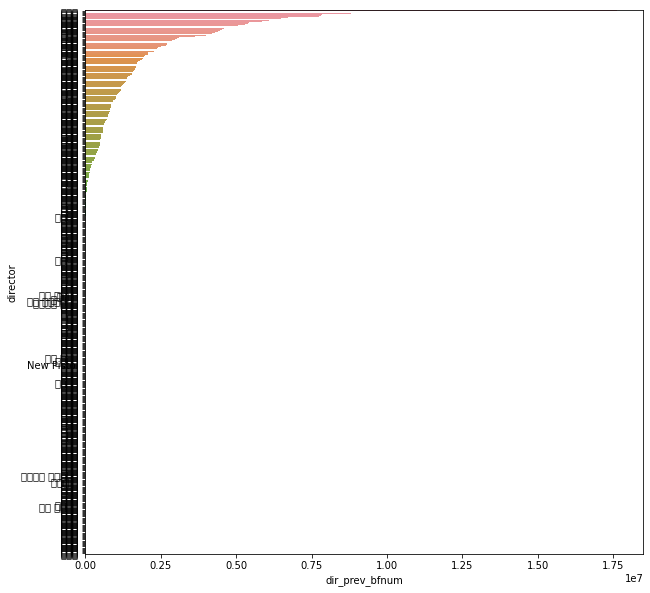

In [ ]:
director_num = train.groupby('director')['dir_prev_bfnum'].sum().sort_values(ascending=False)
df7 = pd.DataFrame(director_num)
df7["director"]= df7.index #director 열 생성
plt.rcParams['figure.figsize'] = [10,10] 
ax = plt.subplots()
ax = sns.barplot(x='dir_prev_bfnum', y='director',data = df7)

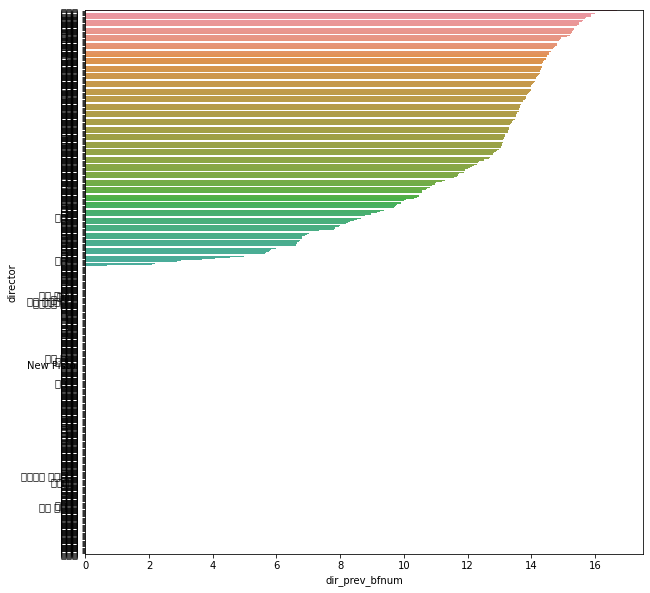

In [ ]:
#위의 그래프가 왜곡되어있으므로 log1p 변환을 통해 왜곡 정도 향상
director_num = train.groupby('director')['dir_prev_bfnum'].sum().sort_values(ascending=False)
df7 = pd.DataFrame(director_num)
df7["director"]= df7.index #director 열 생성
plt.rcParams['figure.figsize'] = [10,10] 
df7['dir_prev_bfnum']=np.log1p(df7['dir_prev_bfnum']) 
ax = plt.subplots()
ax = sns.barplot(x='dir_prev_bfnum', y='director',data = df7)

In [ ]:
df7.drop(['director'], axis=1, inplace=True)
tr_drbf_rank = df7.groupby('director').dir_prev_bfnum.median().reset_index(name = 'drbf_rank').sort_values(by = 'drbf_rank')
tr_drbf_rank

,director,drbf_rank
0,New Pistol,0.000000
277,이대희,0.000000
275,이길보라,0.000000
273,이규만,0.000000
272,이광호,0.000000
...,...,...
62,김상진,15.871628
232,심형래,15.876721
53,김민석,15.990449
5,강형철,16.591959


In [ ]:
tr_drbf_rank['drbf_rank2'] = tr_drbf_rank['drbf_rank'].rank(method='dense', ascending=True)
tr_drbf_rank

,director,drbf_rank,drbf_rank2
0,New Pistol,0.000000,1.0
277,이대희,0.000000,1.0
275,이길보라,0.000000,1.0
273,이규만,0.000000,1.0
272,이광호,0.000000,1.0
...,...,...,...
62,김상진,15.871628,213.0
232,심형래,15.876721,214.0
53,김민석,15.990449,215.0
5,강형철,16.591959,216.0


In [ ]:
#drbf_rank, drbf_rank2 원래 데이터에 추가
train = pd.merge(train, tr_drbf_rank, how = 'left')
test = pd.merge(train, tr_drbf_rank, how = 'left')

In [ ]:
train.head()

8. dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)

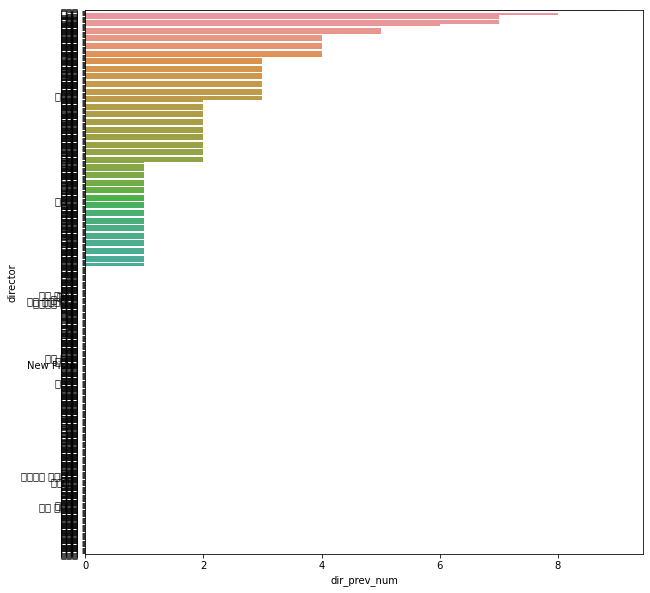

In [ ]:
director_num = train.groupby('director')['dir_prev_num'].sum().sort_values(ascending=False)
df8 = pd.DataFrame(director_num)
df8["director"]= df8.index #director 열 생성
plt.rcParams['figure.figsize'] = [10,10] 
ax = plt.subplots()
ax = sns.barplot(x='dir_prev_num', y='director',data = df8)

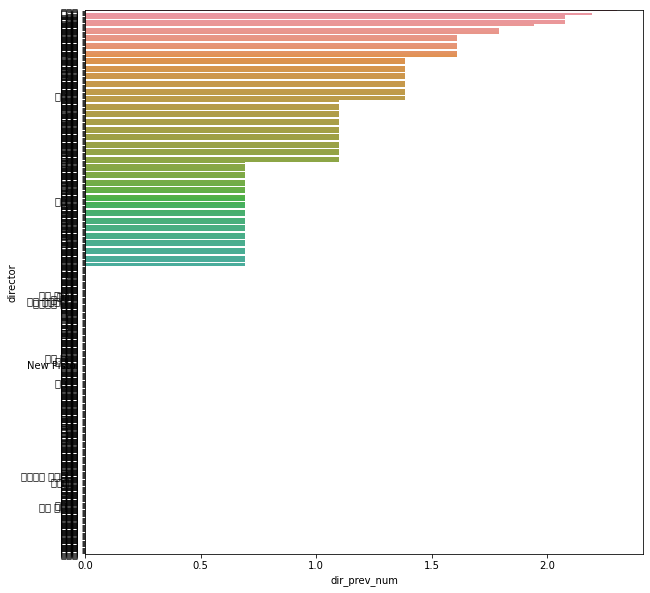

In [ ]:
#위의 그래프가 왜곡되어있으므로 log1p 변환을 통해 왜곡 정도 향상
director_num = train.groupby('director')['dir_prev_num'].sum().sort_values(ascending=False)
df8 = pd.DataFrame(director_num)
df8["director"]= df8.index #director 열 생성
plt.rcParams['figure.figsize'] = [10,10] 
df8['dir_prev_num']=np.log1p(df8['dir_prev_num']) 
ax = plt.subplots()
ax = sns.barplot(x='dir_prev_num', y='director',data = df8)

In [ ]:
df8.drop(['director'], axis=1, inplace=True)
tr_drp_rank = df8.groupby('director').dir_prev_num.median().reset_index(name = 'drp_rank').sort_values(by = 'drp_rank')
tr_drp_rank

,director,drp_rank
0,New Pistol,0.000000
277,이대희,0.000000
275,이길보라,0.000000
273,이규만,0.000000
272,이광호,0.000000
...,...,...
258,유하,2.079442
324,이해영,2.197225
118,김휘,2.197225
62,김상진,2.197225


In [ ]:
tr_drp_rank['drp_rank2'] = tr_drp_rank['drp_rank'].rank(method='dense', ascending=True)
tr_drp_rank

,director,drp_rank,drp_rank2
0,New Pistol,0.000000,1.0
277,이대희,0.000000,1.0
275,이길보라,0.000000,1.0
273,이규만,0.000000,1.0
272,이광호,0.000000,1.0
...,...,...,...
258,유하,2.079442,8.0
324,이해영,2.197225,9.0
118,김휘,2.197225,9.0
62,김상진,2.197225,9.0


In [ ]:
#drp_rank, drp_rank2 원래 데이터에 추가
train = pd.merge(train, tr_drp_rank, how = 'left')
test = pd.merge(train, tr_drp_rank, how = 'left')

In [ ]:
train.head()

6,7,8번 합친 전처리

In [ ]:
train['dr_mean'] = (train['dr_rank2']+train['drbf_rank2'])/2  #6,7번 랭크 합친 변수 추가
test['dr_mean'] = (test['dr_rank2']+test['drbf_rank2'])/2
train.head()

In [ ]:
train.drop(['director','dir_prev_bfnum','dir_prev_num', 'dr_rank2','drbf_rank2'], axis=1, inplace=True) #새 변수 만드는데 사용한 변수 모두 삭제. box_off_num은 전이나 후에 타겟 처리
test.drop(['director','dir_prev_bfnum','dir_prev_num', 'dr_rank2','drbf_rank2'], axis=1, inplace=True)
train.head()

,title,distributor,genre,release_time,time,screening_rat,num_staff,num_actor,box_off_num,dr_rank,drbf_rank,drp_rank,drp_rank2,dr_mean
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,91,2,23398,10.060449,0.000000,0.000000,1.0,133.0
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,387,3,7072501,14.869871,15.484314,1.945910,7.0,325.0
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,343,4,6959083,15.755558,12.304905,1.609438,5.0,274.5
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,20,6,217866,12.291640,10.081425,1.098612,3.0,187.5
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,251,2,483387,13.088575,0.693147,0.693147,2.0,180.0


6,7,8. director와 box_off_num, dir_prev_bfnum, dir_prev_num을 이용해 director의 rank 생성

*   1) 6,7번 평균값 사용안할거면 dr_rank, drbf_rank 사용-dr_mean 삭제
*   2) 평균값 사용할거면 dr_rank, drbf_rank 삭제-dr_mean 사용
*   3) 8번은 drp_rank랑 drp_rank2 중 하나만 골라 쓰면 됨
*   (주의) log1p 변환하고 나면 이전으로 돌아가는 과정 필요하니 그래프 두 개씩 그릴때 순서대로 그리기. 아니면 두 개 한번에 그리거나

=> 일단 dr_mean, drp_rank2만 남겨놓음

In [ ]:
train.drop(['dr_rank','drbf_rank','drp_rank'], axis=1, inplace=True) #위에 필기 반영
test.drop(['dr_rank','drbf_rank','drp_rank'], axis=1, inplace=True)
train.head()

,title,distributor,genre,release_time,time,screening_rat,num_staff,num_actor,box_off_num,drp_rank2,dr_mean
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,91,2,23398,1.0,133.0
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,387,3,7072501,7.0,325.0
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,343,4,6959083,5.0,274.5
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,20,6,217866,3.0,187.5
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,251,2,483387,2.0,180.0
